In [1]:
import json
from collections import OrderedDict
from functools import cache

# Load the JSON file
@cache
def extract_parameters_timeline(file_path, parameter):
    with open(file_path, 'r') as file:
        data = json.load(file, object_pairs_hook=OrderedDict)

    parameter_list = []
    for _, value in data.items():
        parameter_list.append(value[parameter]['observation'])

    return parameter_list
    

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('../single_parameter/combined_data/statistics.csv')

# Filter out rows where TuningParameter is 'NONE'
filtered_df = df[df['TuningParameters'] != 'NONE']

# Group by the TuningParameter column
grouped = filtered_df.groupby('TuningParameters')

In [4]:
import numpy as np
base_path = "../single_parameter/combined_data"

parameter_dict = {}
for name, group in grouped:
    print(f'Processing group: {name}')
    matrix = []
    for index, row in group.iterrows():
        path = f"{base_path}/{row['TargetModule']}/{row['RunId']}/parameters_timeline.json"
        matrix.append(extract_parameters_timeline(path, name))
    df_matrix = np.array(pd.DataFrame(matrix))
    parameter_dict[f"{name}"] = df_matrix


Processing group: ChangeParameterProbability
Processing group: ChromosomeLength
Processing group: CrossoverRate
Processing group: Elite
Processing group: Population
Processing group: RandomPerturbation
Processing group: StatementInsertionProbability
Processing group: TestChangeProbability
Processing group: TestDeleteProbability
Processing group: TestInsertProbability
Processing group: TestInsertionProbability
Processing group: TournamentSize


In [7]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

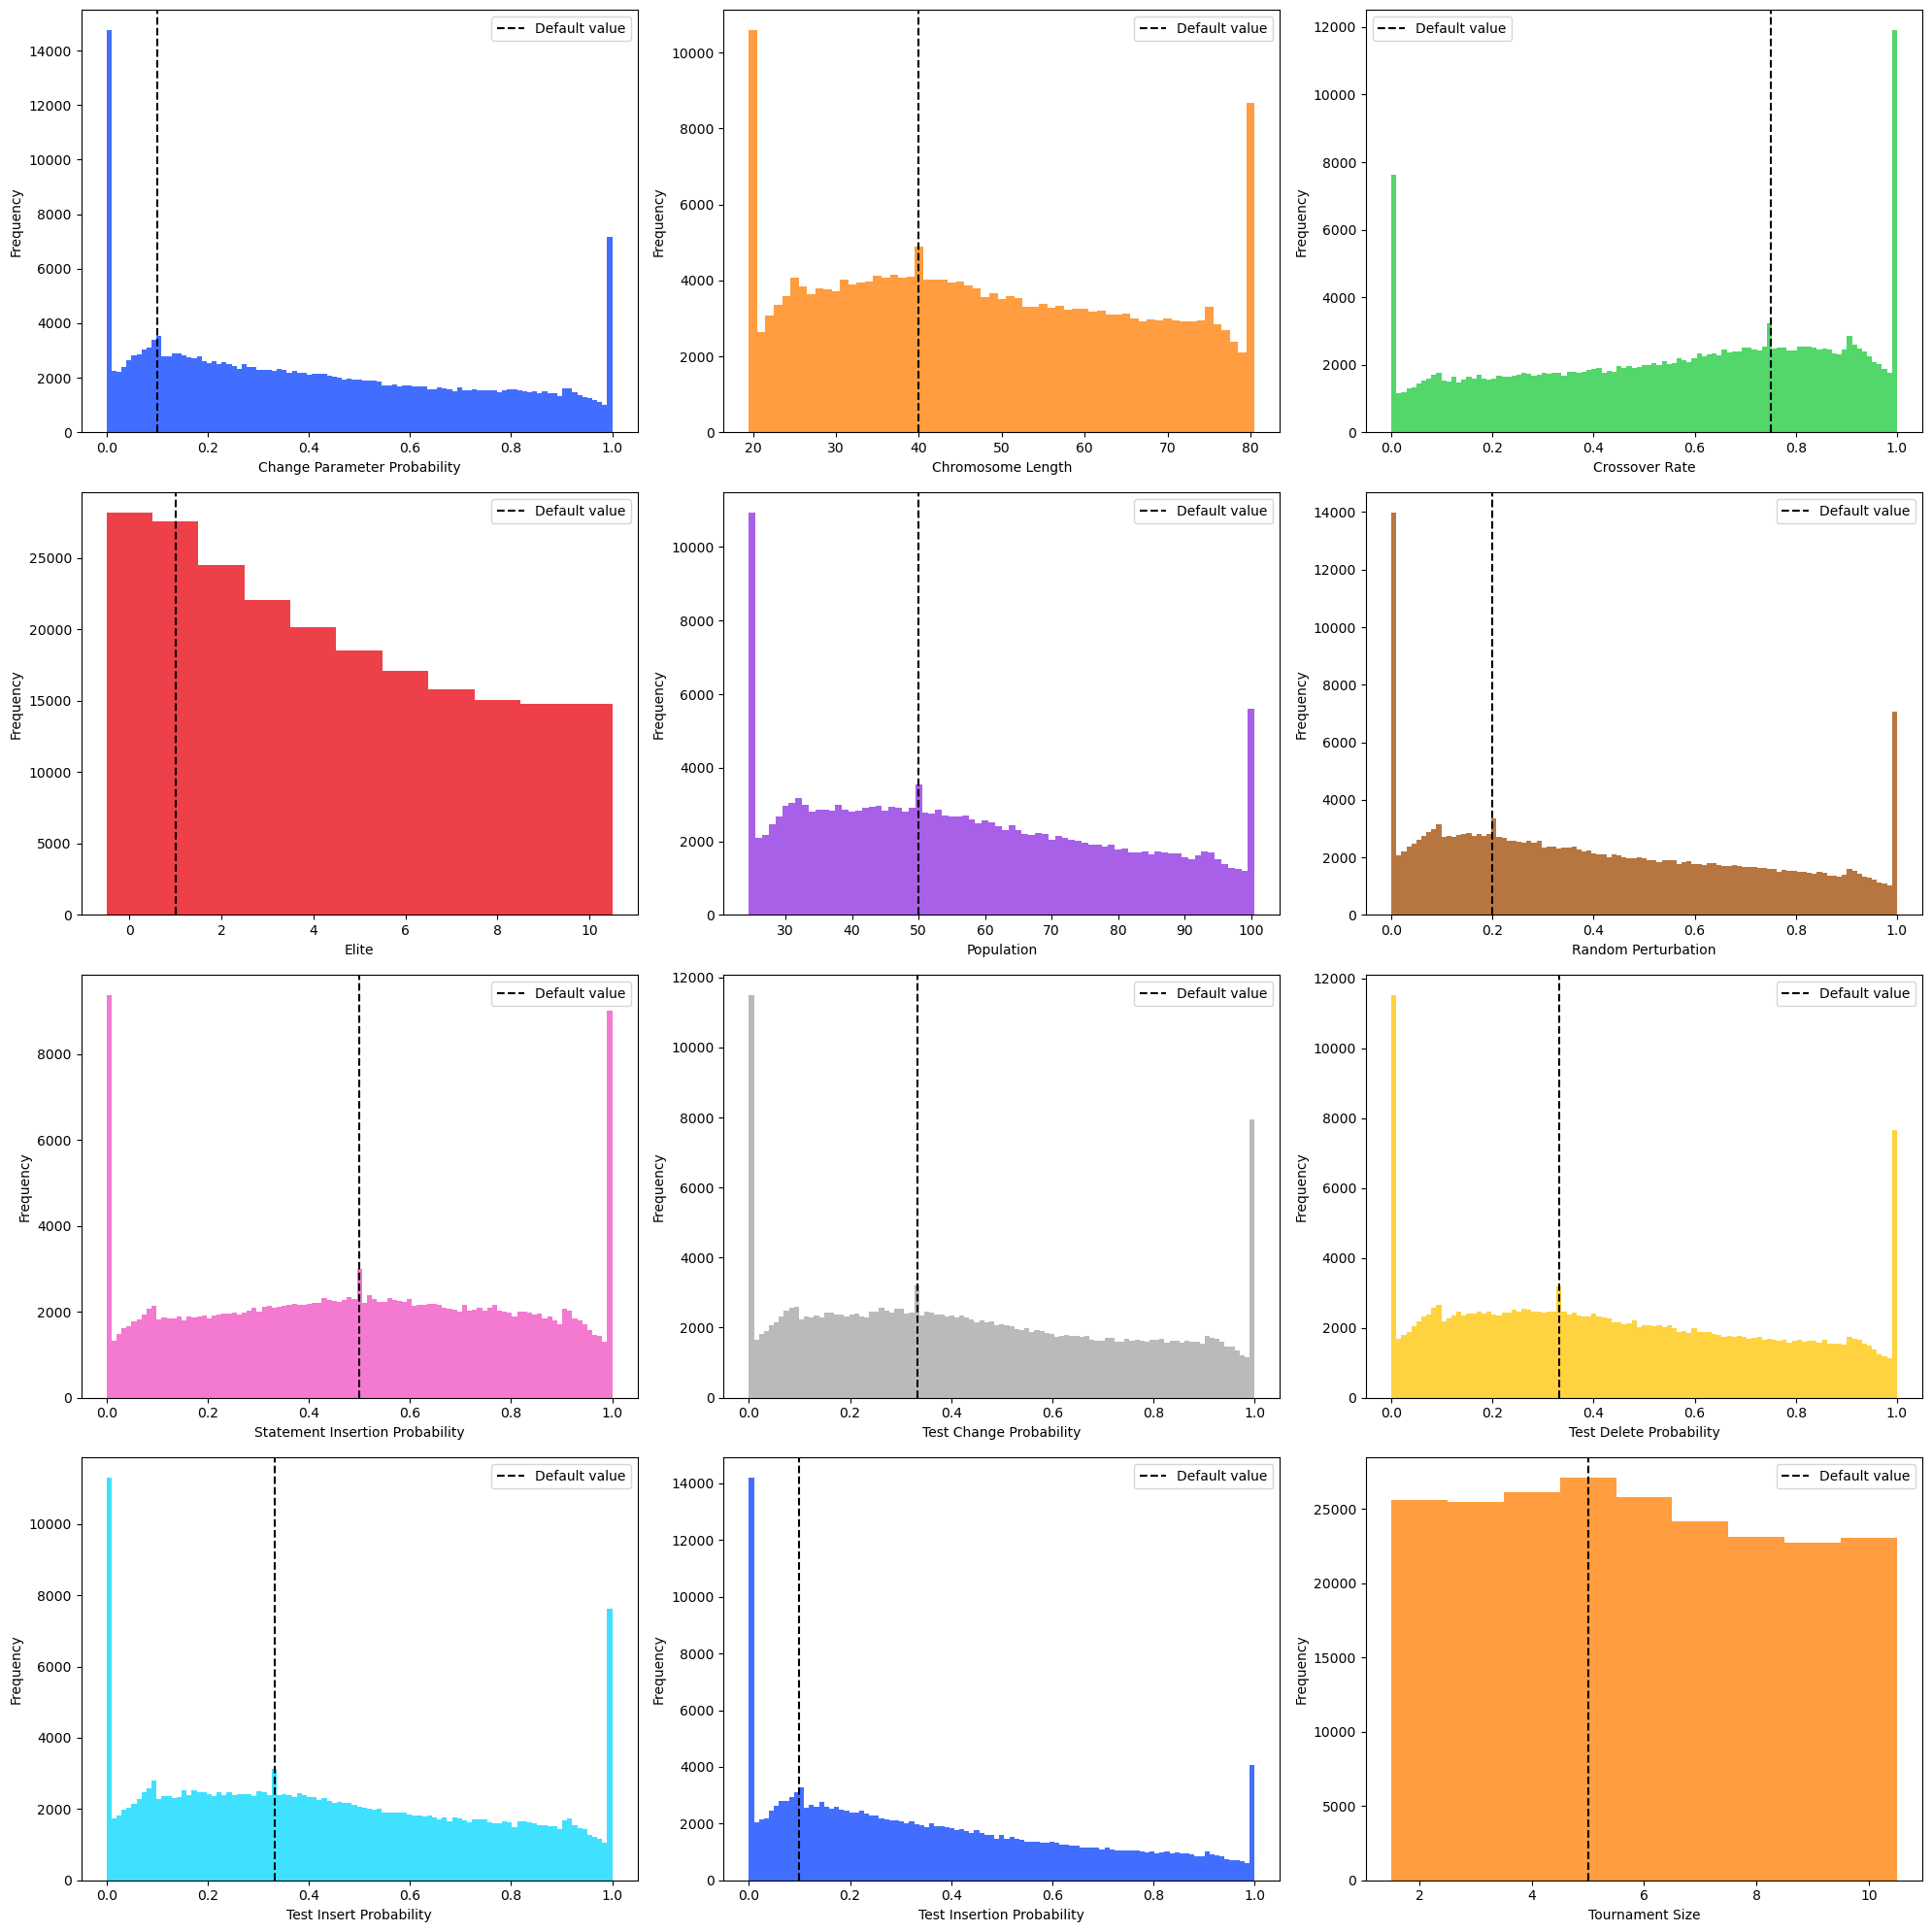

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.prior_check_helper import HistogramPlot, plot_histograms


prob_bins = 101
pal = sns.color_palette("bright", 12)

plots = [
HistogramPlot(parameter_dict['ChangeParameterProbability'].flatten(), "", "Change Parameter Probability", pal[0], bin_range=(0,1), bins=prob_bins, default_value=0.1),
HistogramPlot(parameter_dict['ChromosomeLength'].flatten(), "", "Chromosome Length", pal[1], bins=np.arange(20, 82) - 0.5, default_value=40),
HistogramPlot(parameter_dict['CrossoverRate'].flatten(), "", "Crossover Rate", pal[2], bin_range=(0,1), bins=prob_bins, default_value=0.75),
HistogramPlot(parameter_dict['Elite'].flatten(), "", "Elite", pal[3], bins=np.arange(0,12) - 0.5, default_value=1),
HistogramPlot(parameter_dict['Population'].flatten(), "", "Population", pal[4], bins=np.arange(25,102) - 0.5, default_value=50),
HistogramPlot(parameter_dict['RandomPerturbation'].flatten(), "", "Random Perturbation", pal[5], bin_range=(0,1), bins=prob_bins, default_value=0.2),
HistogramPlot(parameter_dict['StatementInsertionProbability'].flatten(), "", "Statement Insertion Probability", pal[6], bin_range=(0,1), bins=prob_bins, default_value=0.5),
HistogramPlot(parameter_dict['TestChangeProbability'].flatten(), "", "Test Change Probability", pal[7], bin_range=(0,1), bins=prob_bins, default_value=0.333),
HistogramPlot(parameter_dict['TestDeleteProbability'].flatten(), "", "Test Delete Probability", pal[8], bin_range=(0,1), bins=prob_bins, default_value=0.333),
HistogramPlot(parameter_dict['TestInsertProbability'].flatten(), "", "Test Insert Probability", pal[9], bin_range=(0,1), bins=prob_bins, default_value=0.333),
HistogramPlot(parameter_dict['TestInsertionProbability'].flatten(), "", "Test Insertion Probability", pal[10], bin_range=(0,1), bins=prob_bins, default_value=0.1),
HistogramPlot(parameter_dict['TournamentSize'].flatten(), "", "Tournament Size", pal[11], bins=np.arange(2,12) - 0.5, default_value=5),
]


plot_histograms(plots, 4, 3, (20,20), True, "parameter_histogram","parameter_histograms/")